## Bike Sharing Assignment

In [1]:
import datetime
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split

from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings('ignore')

In [2]:
bike_sharing = pd.read_csv('day.csv')

In [3]:
# Check the head of the dataset
bike_sharing.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,6,0,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,0,0,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,1,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,2,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,3,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [4]:
bike_sharing.shape

(730, 16)

In [5]:
bike_sharing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [6]:
bike_sharing.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.997260,0.683562,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.006161,0.465405,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


<Axes: xlabel='hum', ylabel='Count'>

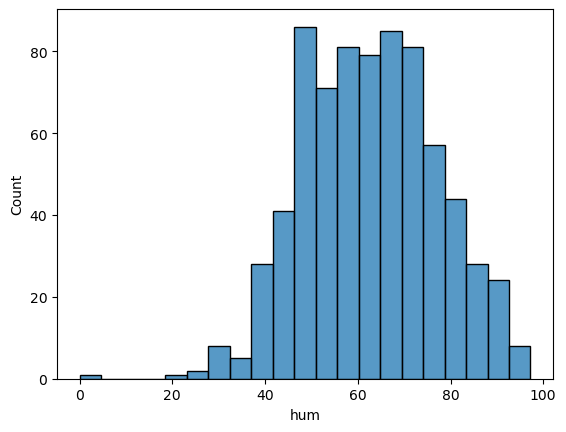

In [7]:
sns.histplot(x = 'hum', data = bike_sharing)

In [8]:
bike_sharing.loc[bike_sharing['hum'] == 0]

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
68,69,10-03-2018,1,0,3,0,4,1,3,15.952731,19.2834,0.0,17.545759,46,577,623


In [9]:
bike_sharing.iloc[68,1]

'10-03-2018'

In [10]:
bike_sharing['hum'].mode()

0    61.3333
Name: hum, dtype: float64

In [11]:
bike_sharing.iloc[68,11] = bike_sharing['hum'].mode()

In [12]:
bike_sharing.iloc[68,]

instant               69
dteday        10-03-2018
season                 1
yr                     0
mnth                   3
holiday                0
weekday                4
workingday             1
weathersit             3
temp           15.952731
atemp            19.2834
hum              61.3333
windspeed      17.545759
casual                46
registered           577
cnt                  623
Name: 68, dtype: object

In [13]:
bike_sharing['dteday'] = pd.DatetimeIndex(bike_sharing['dteday']).day

In [14]:
bike_sharing = bike_sharing.rename(columns={"dteday": "date"})

In [15]:
bike_sharing[['season']] = bike_sharing[['season']].apply(lambda x: x.map({1:'spring', 2:'summer', 3:'fall', 4:'winter'}))

In [16]:
bike_sharing[['weathersit']] = bike_sharing[['weathersit']].apply(lambda x: 
                                                                  x.map({1:'Clear', 2:'Mist', 3:'Light Snow', 4:'Heavy Rain'}))

In [17]:
bike_sharing[['weekday']] = bike_sharing[['weekday']].apply(lambda x: 
                                                            x.map({0:'Sun', 1:'Mon', 2:'Tue', 3:'Wed',4:'Thu',5:'Fri',6:'Sat'}))

In [18]:
bike_sharing['mnth'] = bike_sharing['mnth'].apply(lambda x: datetime.date(1900, x , 1).strftime('%B'))

In [19]:
bike_sharing = bike_sharing.drop(['instant','date','casual','registered'], axis = 1)

In [20]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,January,0,Sat,0,Mist,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,January,0,Sun,0,Mist,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,January,0,Mon,1,Clear,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,January,0,Tue,1,Clear,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,January,0,Wed,1,Clear,9.305237,11.46350,43.6957,12.522300,1600


In [21]:
bike_sharing.weathersit.value_counts()

weathersit
Clear         463
Mist          246
Light Snow     21
Name: count, dtype: int64

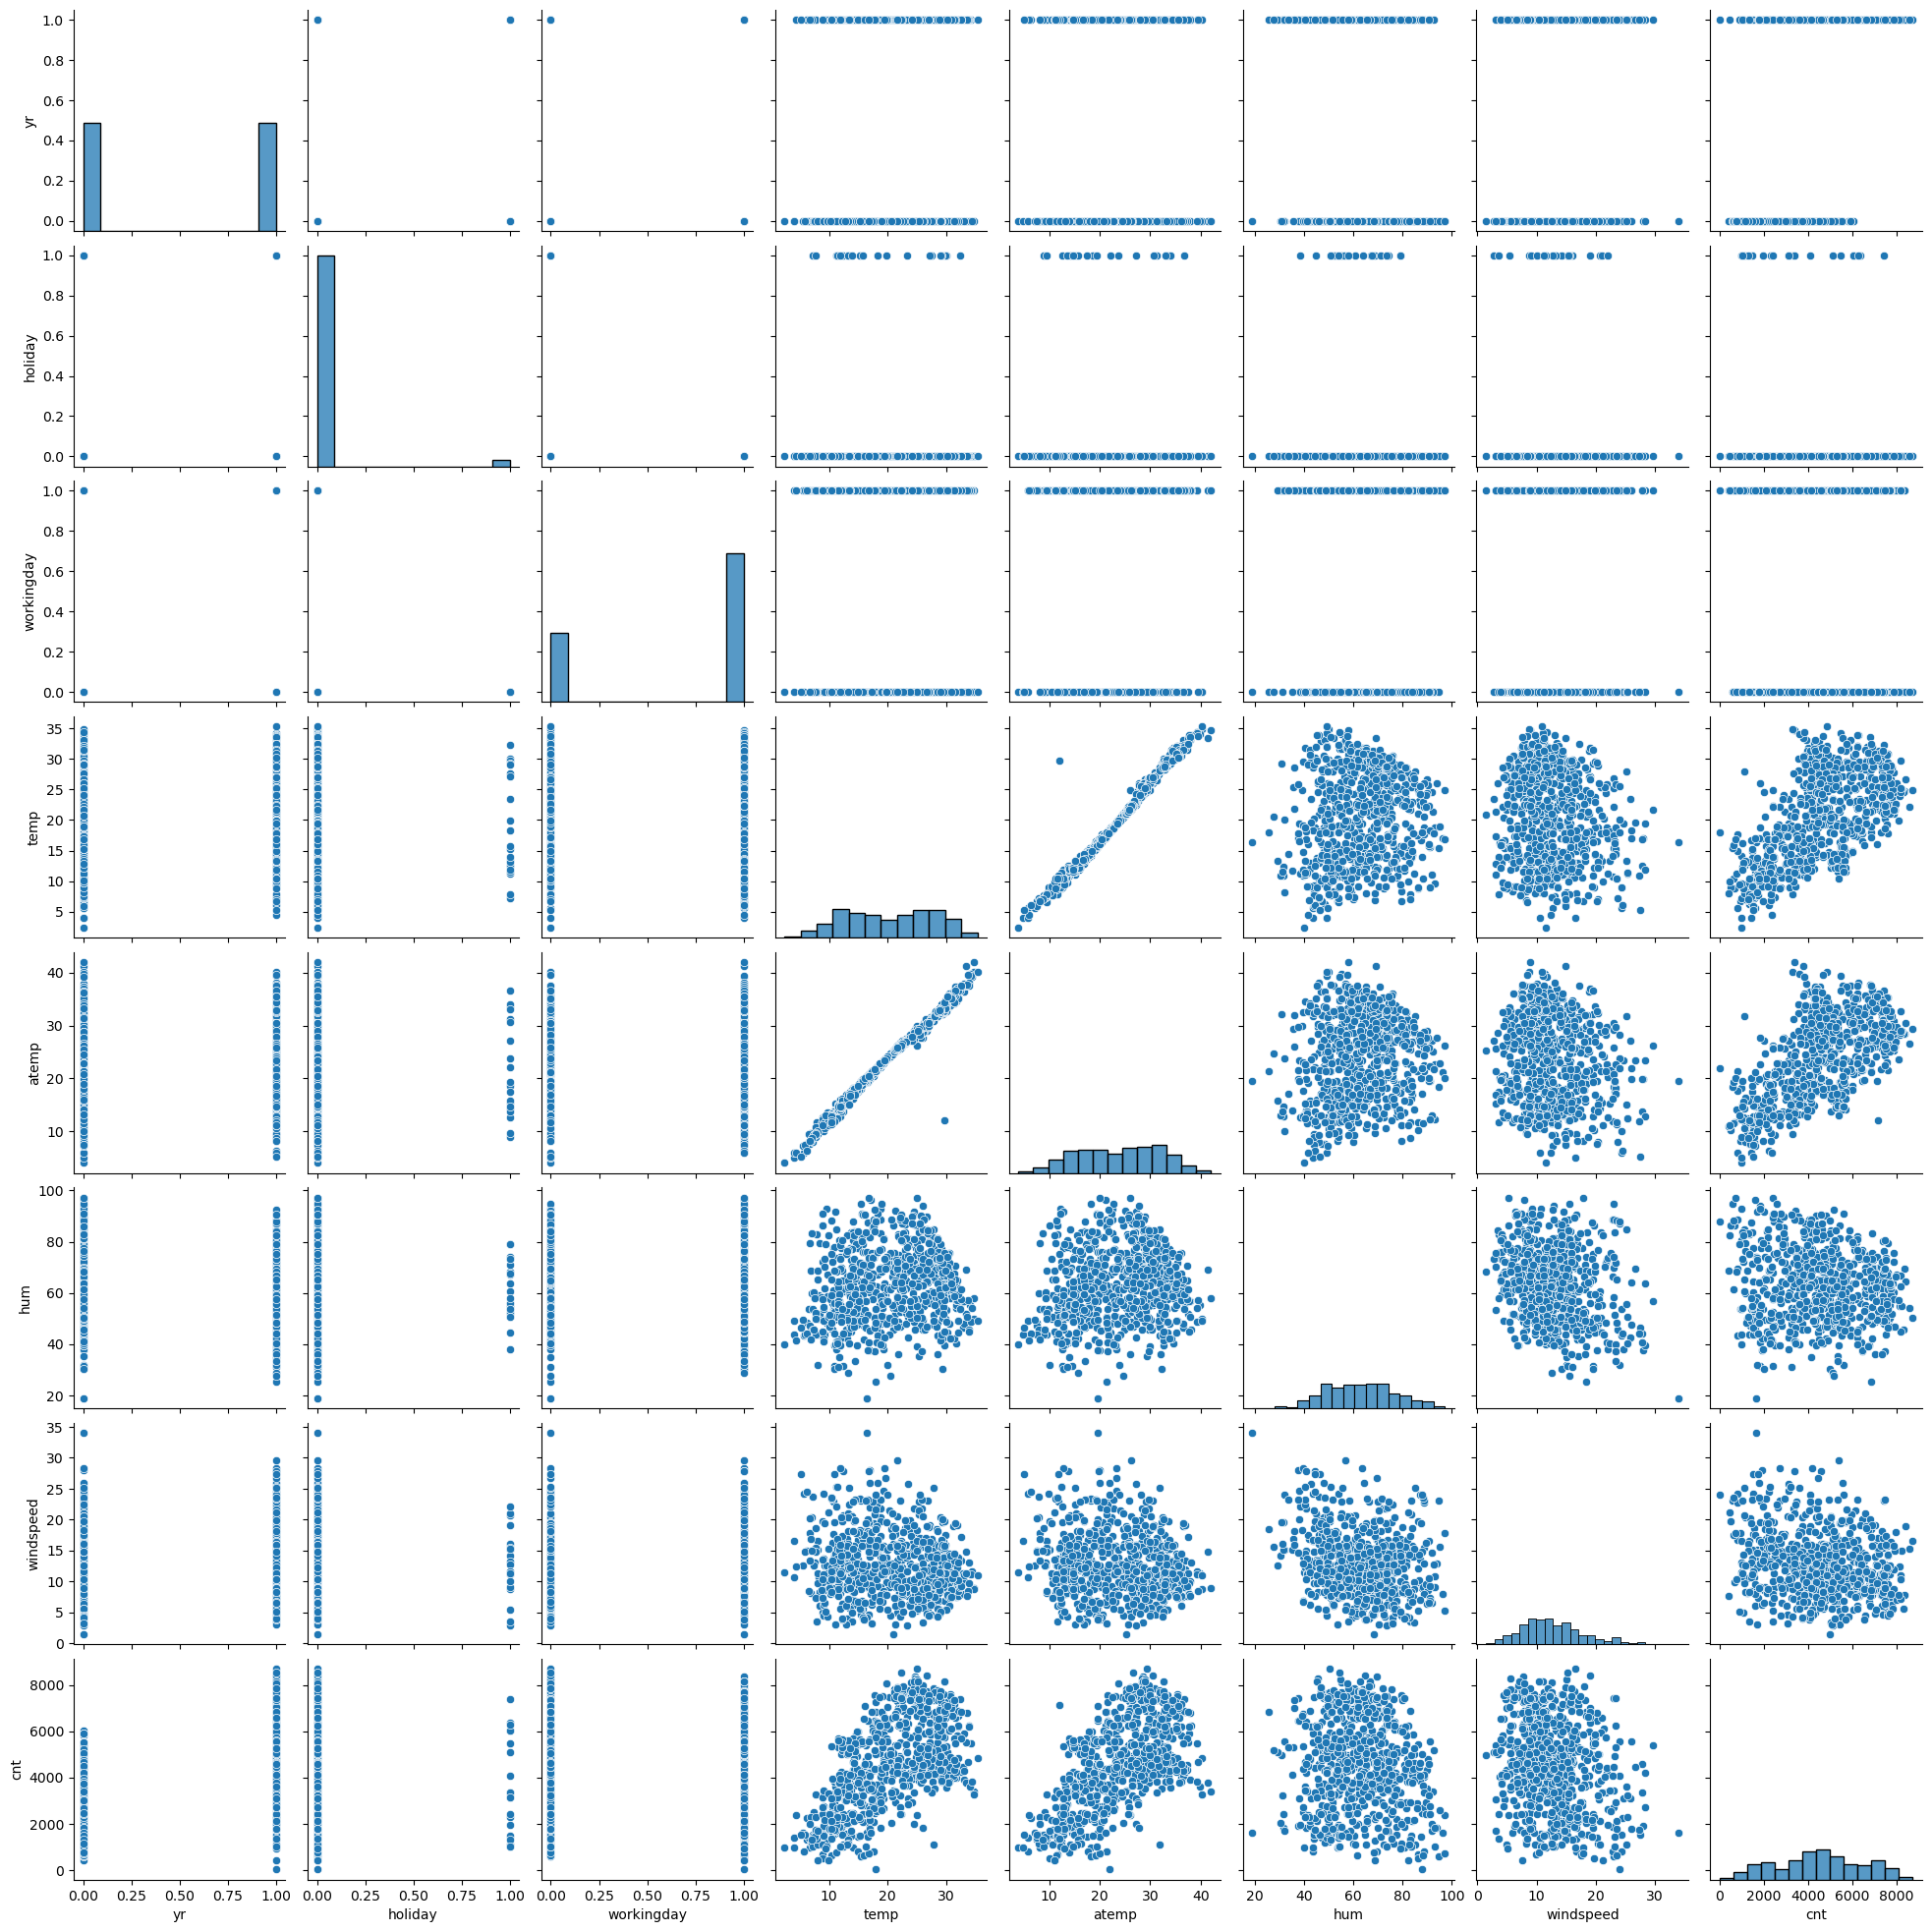

In [22]:
sns.pairplot(bike_sharing)
plt.show()

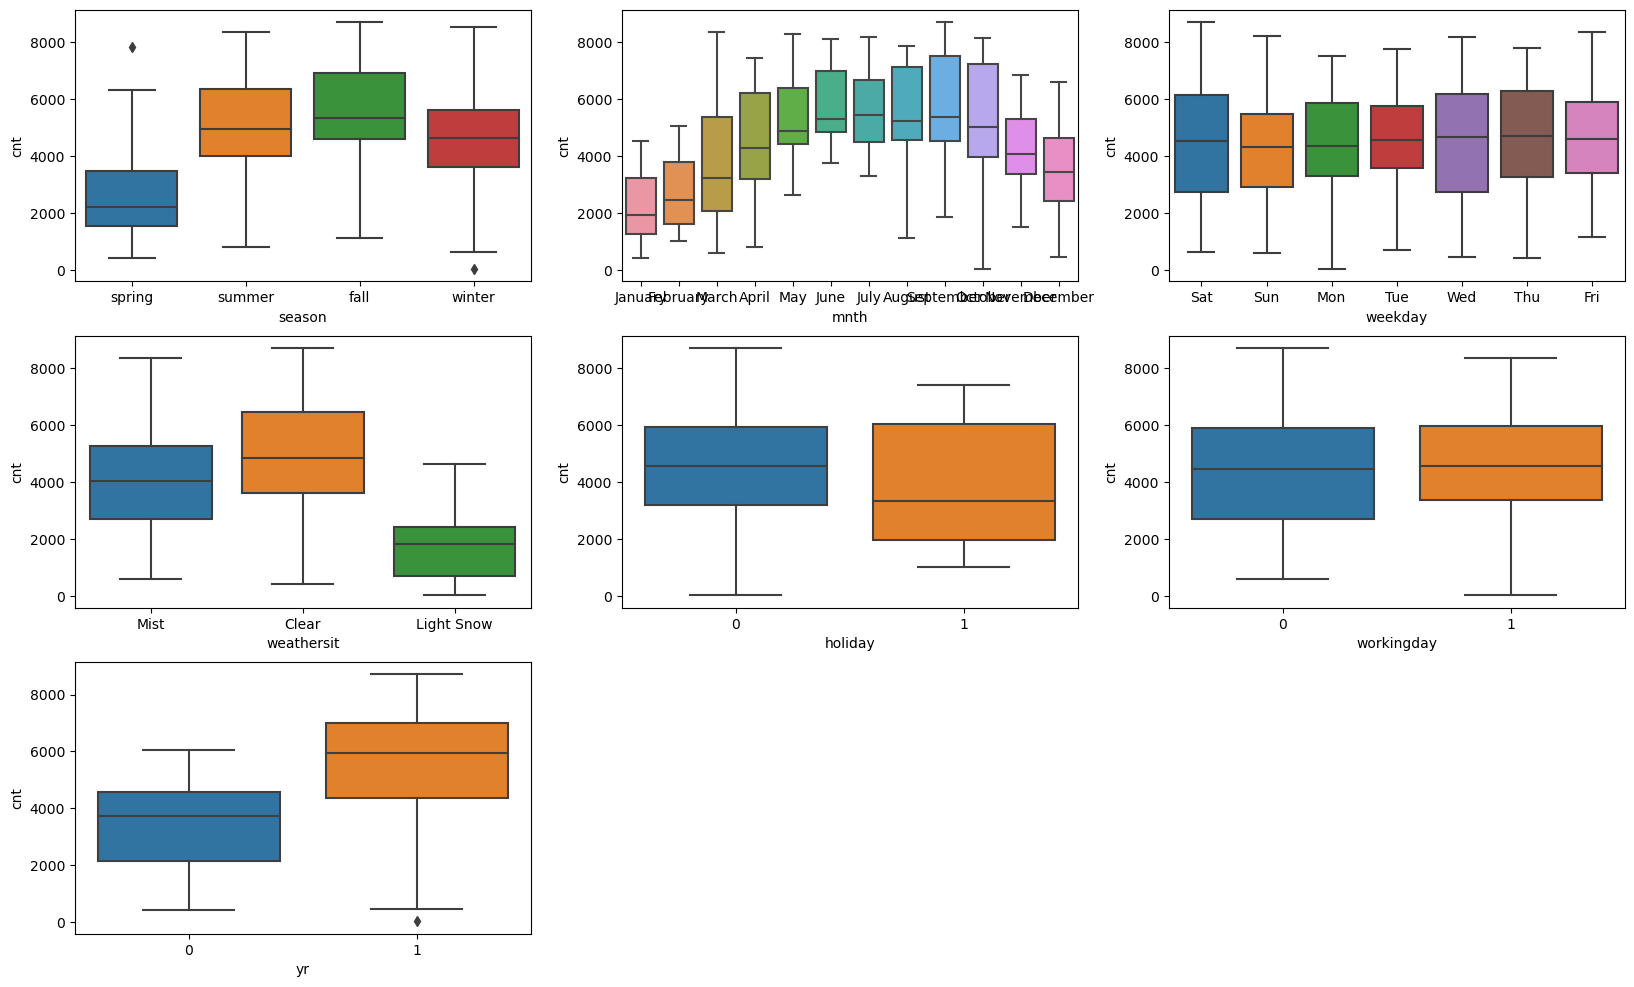

In [23]:
# Analysing/visualizing the categorical columns to see how predictor variable stands against the target variable
plt.figure(figsize=(20, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,3)
sns.boxplot(x = 'weekday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,4)
sns.boxplot(x = 'weathersit', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,5)
sns.boxplot(x = 'holiday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = bike_sharing)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = bike_sharing)

plt.show()



In [24]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt'],
      dtype='object')

In [25]:
# Get the dummy variables for the feature 'season'
dummy_vars =['season','mnth','weekday','weathersit']
dummy_var_df = pd.get_dummies(bike_sharing[dummy_vars], prefix = None, drop_first = True, dtype = 'int')

In [26]:
# Add the results to the original housing dataframe
bike_sharing = pd.concat([bike_sharing, dummy_var_df], axis = 1)

In [27]:
bike_sharing.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,spring,0,January,0,Sat,0,Mist,14.110847,18.18125,80.5833,...,0,0,0,1,0,0,0,0,0,1
1,spring,0,January,0,Sun,0,Mist,14.902598,17.68695,69.6087,...,0,0,0,0,1,0,0,0,0,1
2,spring,0,January,0,Mon,1,Clear,8.050924,9.47025,43.7273,...,0,0,1,0,0,0,0,0,0,0
3,spring,0,January,0,Tue,1,Clear,8.200000,10.60610,59.0435,...,0,0,0,0,0,0,1,0,0,0
4,spring,0,January,0,Wed,1,Clear,9.305237,11.46350,43.6957,...,0,0,0,0,0,0,0,1,0,0


In [28]:
bike_sharing.columns

Index(['season', 'yr', 'mnth', 'holiday', 'weekday', 'workingday',
       'weathersit', 'temp', 'atemp', 'hum', 'windspeed', 'cnt',
       'season_spring', 'season_summer', 'season_winter', 'mnth_August',
       'mnth_December', 'mnth_February', 'mnth_January', 'mnth_July',
       'mnth_June', 'mnth_March', 'mnth_May', 'mnth_November', 'mnth_October',
       'mnth_September', 'weekday_Mon', 'weekday_Sat', 'weekday_Sun',
       'weekday_Thu', 'weekday_Tue', 'weekday_Wed', 'weathersit_Light Snow',
       'weathersit_Mist'],
      dtype='object')

In [29]:
bike_sharing = bike_sharing.drop(dummy_vars, axis = 1)

In [30]:
bike_sharing.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
0,0,0,0,14.110847,18.18125,80.5833,10.749882,985,1,0,...,0,0,0,1,0,0,0,0,0,1
1,0,0,0,14.902598,17.68695,69.6087,16.652113,801,1,0,...,0,0,0,0,1,0,0,0,0,1
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,1,0,...,0,0,1,0,0,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,1,0,...,0,0,0,0,0,0,1,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,1,0,...,0,0,0,0,0,0,0,1,0,0


In [31]:
# splitting the dataframe into Train and Test

np.random.seed(0)
bike_sharing_train, bike_sharing_test = train_test_split(bike_sharing, train_size = 0.7, random_state = 100)

In [32]:
from sklearn.preprocessing import MinMaxScaler

In [33]:
scaler = MinMaxScaler()

In [34]:
# Apply scaler() to all the columns except the 'yes-no' and 'dummy' variables
num_vars = ['temp', 'atemp','hum', 'windspeed','cnt']

bike_sharing_train[num_vars] = scaler.fit_transform(bike_sharing_train[num_vars])

In [35]:
bike_sharing_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
576,1,0,1,0.815169,0.766351,0.659744,0.264686,0.827658,0,0,...,0,0,0,0,0,0,1,0,0,0
426,1,0,0,0.442393,0.438975,0.553780,0.255342,0.465255,1,0,...,0,0,0,1,0,0,0,0,0,1
728,1,0,0,0.245101,0.200348,0.377528,0.663106,0.204096,1,0,...,0,0,0,0,1,0,0,0,0,0
482,1,0,0,0.395666,0.391735,0.385516,0.188475,0.482973,0,1,...,0,0,0,1,0,0,0,0,0,1
111,0,0,1,0.345824,0.318819,0.692225,0.380981,0.191095,0,1,...,0,0,0,0,0,0,0,0,0,1


In [36]:
# Function for stats model
def ML(y_train, X_train_):
    X_train = sm.add_constant(X_train_)
    lr = sm.OLS(y_train, X_train)
    lr_model = lr.fit()
    print(lr_model.summary())
    return lr

# Function for VIF calculation
def VIF(X_train): 
    vif = pd.DataFrame()
    vif['Features'] = X_train.columns
    vif['VIF'] = [variance_inflation_factor(X_train.values, i) for i in range(X_train[col].shape[1])]
    vif['VIF'] = round(vif['VIF'], 2)
    vif = vif.sort_values(by = "VIF", ascending = False)
    return vif

In [37]:
y_train = bike_sharing_train.pop('cnt')
X_train = bike_sharing_train

In [38]:
ML(y_train, X_train)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.853
Model:                            OLS   Adj. R-squared:                  0.844
Method:                 Least Squares   F-statistic:                     99.48
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          2.22e-180
Time:                        23:20:01   Log-Likelihood:                 527.38
No. Observations:                 510   AIC:                            -996.8
Df Residuals:                     481   BIC:                            -874.0
Df Model:                          28                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.22

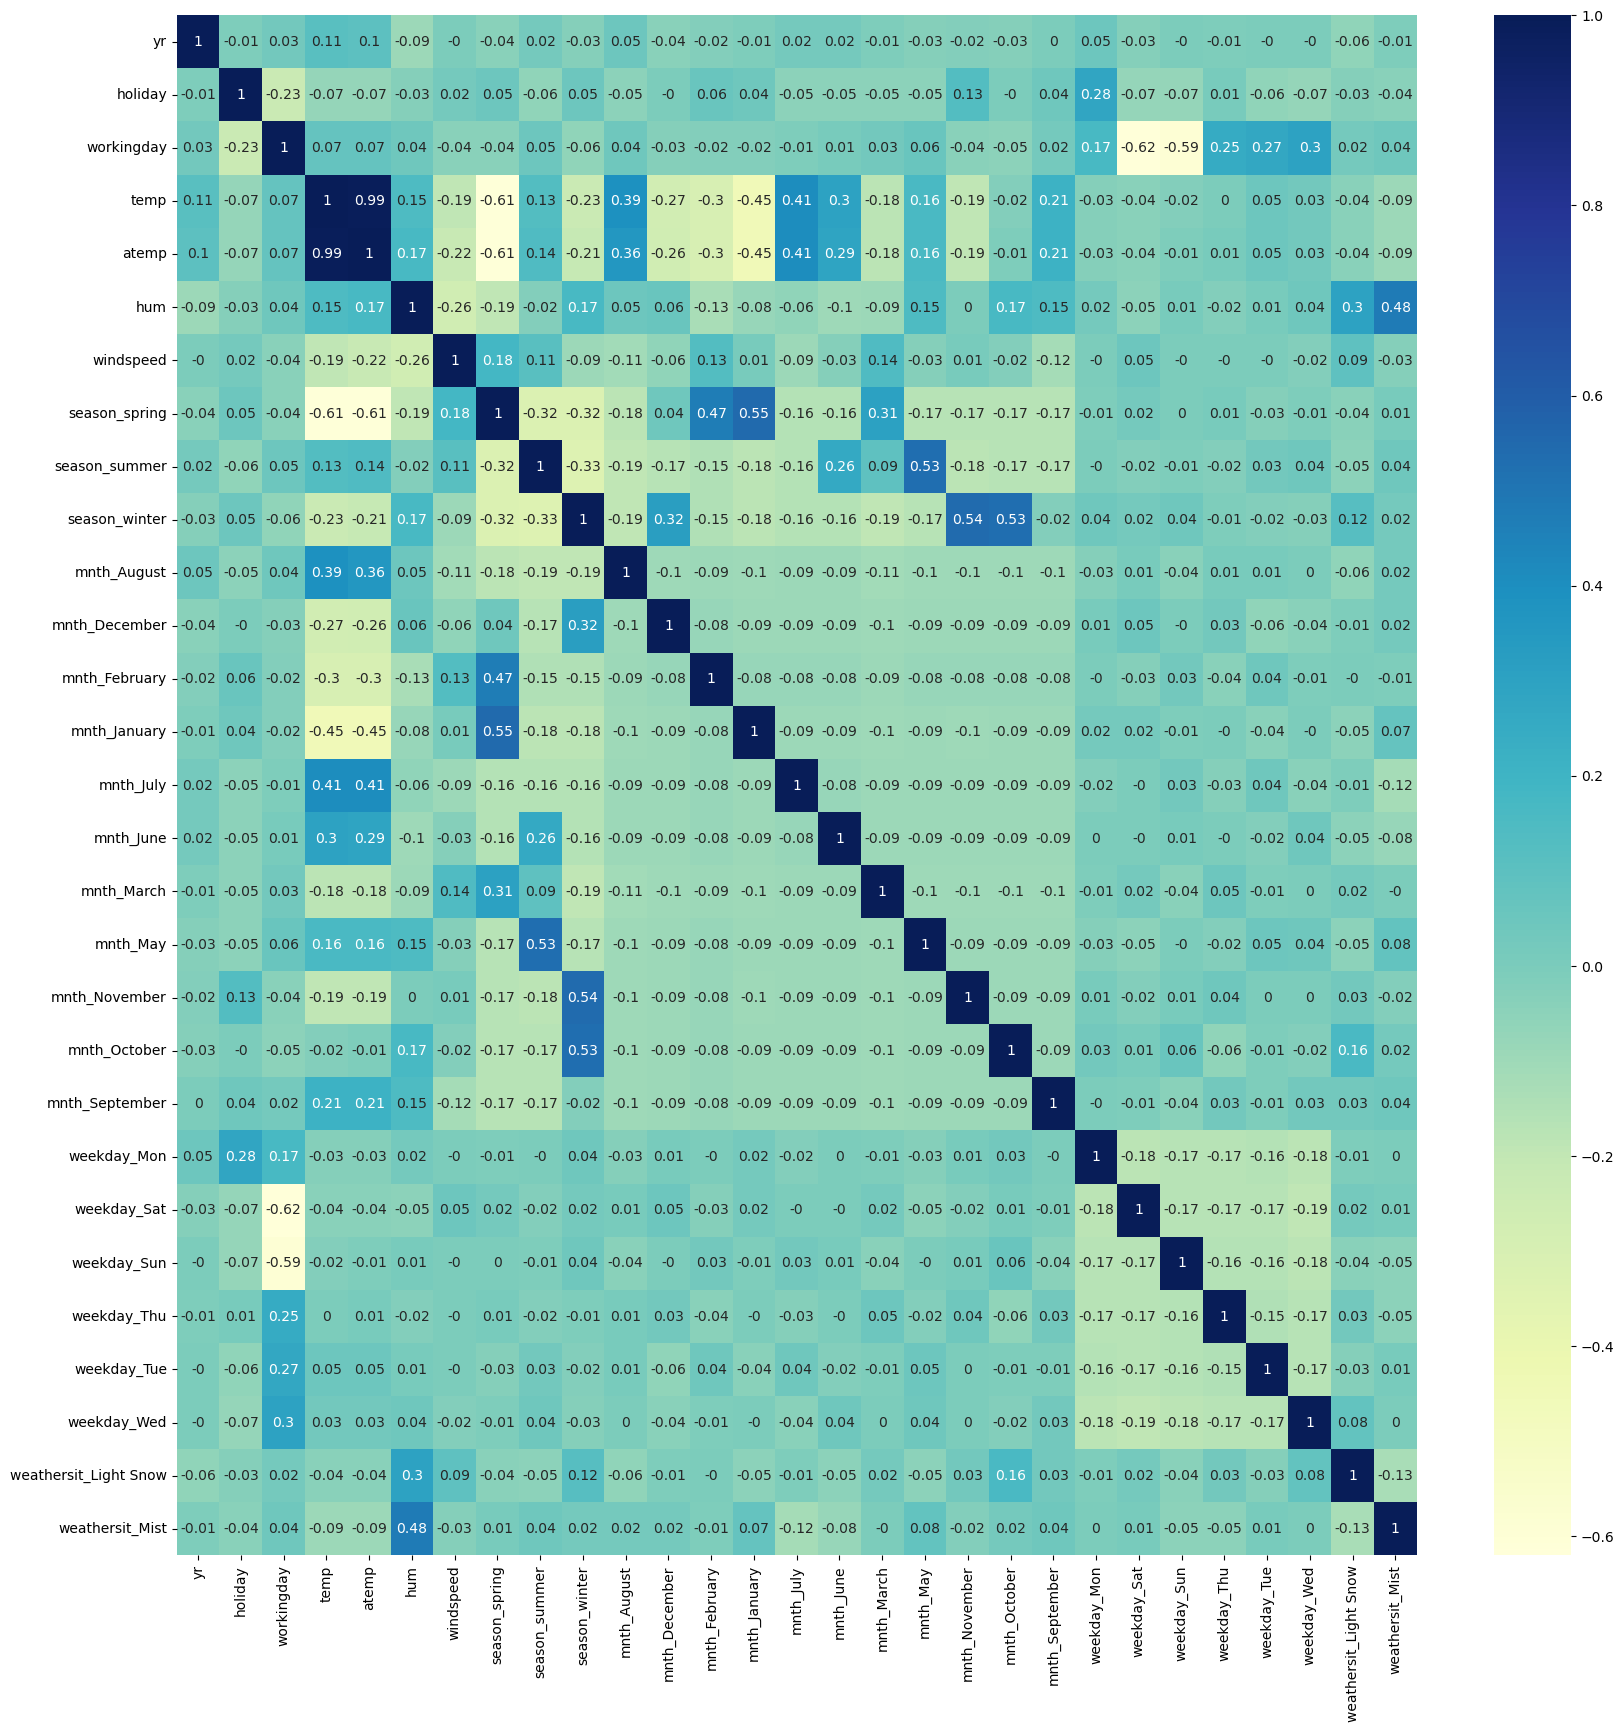

In [39]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (20, 20))
sns.heatmap(round(bike_sharing_train.corr(),2), annot = True, cmap="YlGnBu")
plt.show()

In [40]:
import statsmodels.api as sm

# Add a constant
X_train_lm = sm.add_constant(X_train[['temp']])

# Create a first fitted model
lr = sm.OLS(y_train, X_train_lm).fit()

In [41]:
# Check the parameters obtained

lr.params

const    0.169031
temp     0.640944
dtype: float64

In [42]:
X_train_lm.head()

,const,temp
576,1.0,0.815169
426,1.0,0.442393
728,1.0,0.245101
482,1.0,0.395666
111,1.0,0.345824


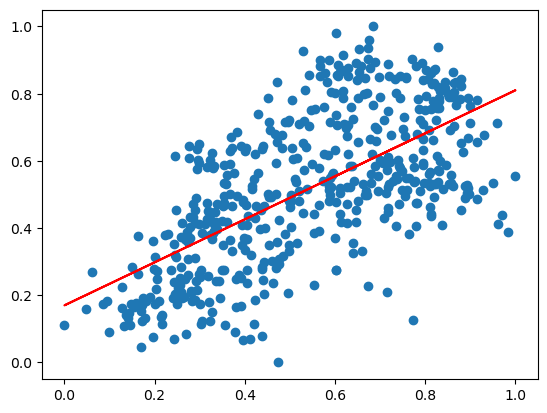

In [43]:
# Let's visualise the data with a scatter plot and the fitted regression line
plt.scatter(X_train_lm.iloc[:, 1], y_train)
plt.plot(X_train_lm.iloc[:, 1], 0.170 + 0.640*X_train_lm.iloc[:, 1], 'r')
plt.show()

In [44]:
#Print a summary of the linear regression model obtained
print(lr.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.416
Model:                            OLS   Adj. R-squared:                  0.415
Method:                 Least Squares   F-statistic:                     362.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):           2.46e-61
Time:                        23:20:08   Log-Likelihood:                 176.09
No. Observations:                 510   AIC:                            -348.2
Df Residuals:                     508   BIC:                            -339.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.1690      0.020      8.608      0.0

In [45]:
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE

In [46]:
lm = LinearRegression()
lm.fit(X_train, y_train)
rfe = RFE(lm, n_features_to_select = 14) 
rfe = rfe.fit(X_train, y_train)

In [47]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 8),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 2),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_August', False, 9),
 ('mnth_December', False, 5),
 ('mnth_February', False, 6),
 ('mnth_January', False, 3),
 ('mnth_July', True, 1),
 ('mnth_June', False, 15),
 ('mnth_March', False, 16),
 ('mnth_May', False, 7),
 ('mnth_November', False, 4),
 ('mnth_October', False, 14),
 ('mnth_September', True, 1),
 ('weekday_Mon', False, 10),
 ('weekday_Sat', True, 1),
 ('weekday_Sun', True, 1),
 ('weekday_Thu', False, 12),
 ('weekday_Tue', False, 11),
 ('weekday_Wed', False, 13),
 ('weathersit_Light Snow', True, 1),
 ('weathersit_Mist', True, 1)]

In [48]:
rfe_df = pd.DataFrame({'Predictor': X_train.columns, 'Select Status': rfe.support_, 'Ranking': rfe.ranking_})
rfe_df.sort_values(by='Ranking')

,Predictor,Select Status,Ranking
0,yr,True,1
23,weekday_Sun,True,1
22,weekday_Sat,True,1
20,mnth_September,True,1
27,weathersit_Light Snow,True,1
9,season_winter,True,1
8,season_summer,True,1
14,mnth_July,True,1
6,windspeed,True,1
1,holiday,True,1


## Building model with RFE columns

In [49]:
col = X_train.columns[rfe.support_]
X_train_rfe = X_train[col]

In [50]:
X_train.columns[~rfe.support_]

Index(['atemp', 'season_spring', 'mnth_August', 'mnth_December',
       'mnth_February', 'mnth_January', 'mnth_June', 'mnth_March', 'mnth_May',
       'mnth_November', 'mnth_October', 'weekday_Mon', 'weekday_Thu',
       'weekday_Tue', 'weekday_Wed'],
      dtype='object')

## Fine tuning - Manual Feature elimination

In [51]:
ML(y_train, X_train_rfe)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.68e-191
Time:                        23:20:11   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -941.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [52]:
VIF(X_train_rfe)

,Features,VIF
2,workingday,21.19
10,weekday_Sat,5.45
11,weekday_Sun,5.41
4,hum,2.04
1,holiday,1.74
3,temp,1.62
13,weathersit_Mist,1.62
8,mnth_July,1.44
12,weathersit_Light Snow,1.34
6,season_summer,1.33


In [53]:
col = col.drop('workingday',1)

In [54]:
X_train_ml1 = X_train[col]

In [55]:
ML(y_train, X_train_ml1)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     207.9
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.68e-191
Time:                        23:20:11   Log-Likelihood:                 514.25
No. Observations:                 510   AIC:                            -1001.
Df Residuals:                     496   BIC:                            -941.2
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.19

In [56]:
VIF(X_train_ml1)

,Features,VIF
3,hum,12.70
2,temp,9.70
4,windspeed,3.35
12,weathersit_Mist,2.33
0,yr,2.01
5,season_summer,1.76
6,season_winter,1.68
7,mnth_July,1.56
8,mnth_September,1.29
11,weathersit_Light Snow,1.26


In [57]:
col = col.drop('weekday_Sat',1)


In [58]:
X_train_ml2 = X_train[col]

In [59]:
ML(y_train, X_train_ml2)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.845
Model:                            OLS   Adj. R-squared:                  0.841
Method:                 Least Squares   F-statistic:                     225.4
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          3.38e-192
Time:                        23:20:12   Log-Likelihood:                 513.90
No. Observations:                 510   AIC:                            -1002.
Df Residuals:                     497   BIC:                            -946.7
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.20

In [60]:
VIF(X_train_ml2)

,Features,VIF
3,hum,12.66
2,temp,9.69
4,windspeed,3.28
11,weathersit_Mist,2.33
0,yr,2.01
5,season_summer,1.76
6,season_winter,1.68
7,mnth_July,1.55
8,mnth_September,1.29
10,weathersit_Light Snow,1.26


In [61]:
col = col.drop('hum',1)

In [62]:
X_train_ml3 = X_train[col]

In [63]:
ML(y_train, X_train_ml3)

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.838
Model:                            OLS   Adj. R-squared:                  0.834
Method:                 Least Squares   F-statistic:                     233.7
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          1.23e-188
Time:                        23:20:12   Log-Likelihood:                 502.62
No. Observations:                 510   AIC:                            -981.2
Df Residuals:                     498   BIC:                            -930.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [64]:
VIF(X_train_ml3)

,Features,VIF
2,temp,5.10
3,windspeed,3.12
0,yr,2.01
4,season_summer,1.76
6,mnth_July,1.52
10,weathersit_Mist,1.49
5,season_winter,1.46
7,mnth_September,1.29
8,weekday_Sun,1.17
9,weathersit_Light Snow,1.08


In [65]:
col = col.drop('mnth_July',1)

In [66]:
X_train_ml4 = X_train[col]

In [67]:
VIF(X_train_ml4)

,Features,VIF
2,temp,3.73
3,windspeed,3.08
0,yr,2.00
4,season_summer,1.57
9,weathersit_Mist,1.48
5,season_winter,1.39
6,mnth_September,1.21
7,weekday_Sun,1.17
8,weathersit_Light Snow,1.08
1,holiday,1.04


In [68]:
X_train_f = sm.add_constant(X_train_ml4)
lr_f = sm.OLS(y_train,X_train_f).fit()
print(lr_f.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.833
Method:                 Least Squares   F-statistic:                     255.0
Date:                Wed, 18 Oct 2023   Prob (F-statistic):          6.34e-189
Time:                        23:20:13   Log-Likelihood:                 500.42
No. Observations:                 510   AIC:                            -978.8
Df Residuals:                     499   BIC:                            -932.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                            coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------------
const                     0.13

In [69]:
X_train_f

,const,yr,holiday,temp,windspeed,season_summer,season_winter,mnth_September,weekday_Sun,weathersit_Light Snow,weathersit_Mist
576,1.0,1,0,0.815169,0.264686,0,0,0,0,0,0
426,1.0,1,0,0.442393,0.255342,0,0,0,0,0,1
728,1.0,1,0,0.245101,0.663106,0,0,0,1,0,0
482,1.0,1,0,0.395666,0.188475,1,0,0,0,0,1
111,1.0,0,0,0.345824,0.380981,1,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
578,1.0,1,0,0.863973,0.187140,0,0,0,0,0,0
53,1.0,0,0,0.202618,0.111379,0,0,0,0,0,0
350,1.0,0,0,0.248216,0.431816,0,1,0,0,0,1
79,1.0,0,0,0.462664,0.529881,1,0,0,0,0,1


In [70]:
y_train_pred = lr_f.predict(X_train_f)

Text(0.5, 0, 'Errors')

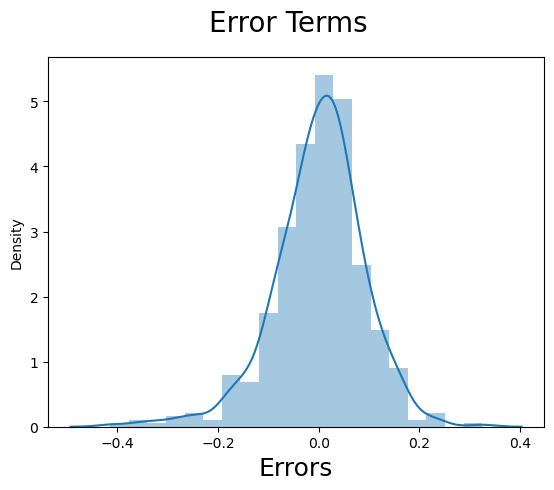

In [71]:
# Plot the histogram of the error terms

fig = plt.figure()
sns.distplot((y_train - y_train_pred), bins = 20)
fig.suptitle('Error Terms', fontsize = 20) 
plt.xlabel('Errors', fontsize = 18)

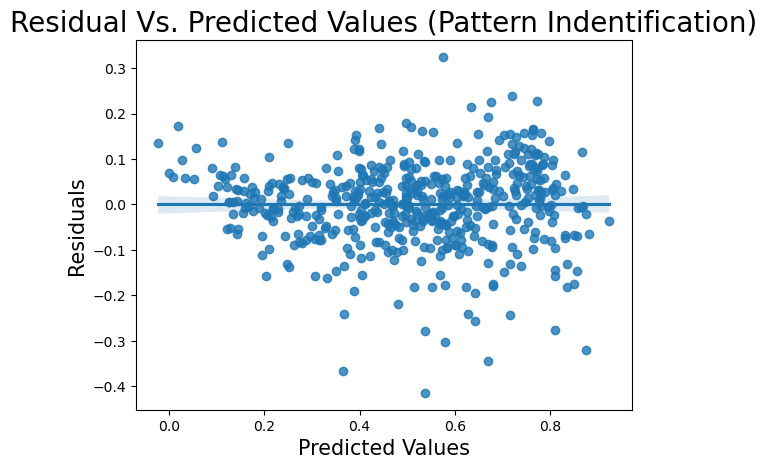

In [72]:
# Plot regen plot of Error Terms - Independent
sns.regplot(x=y_train_pred, y=(y_train - y_train_pred))
plt.title('Residual Vs. Predicted Values (Pattern Indentification)', fontdict={'fontsize': 20})
plt.xlabel('Predicted Values', fontdict={'fontsize': 15})
plt.ylabel('Residuals', fontdict={'fontsize': 15})
plt.show()

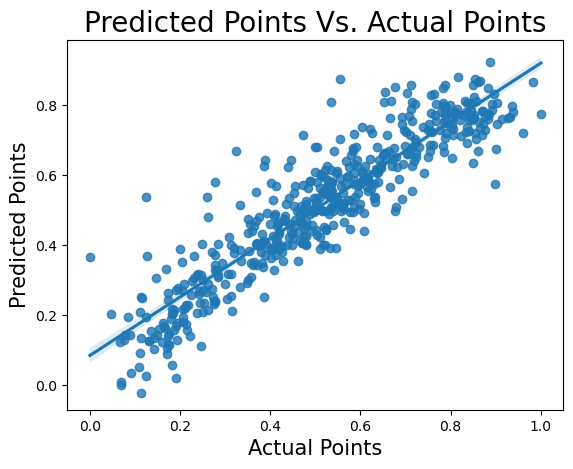

In [73]:
#Homoscedasticity
sns.regplot(x=y_train, y=y_train_pred)
plt.title('Predicted Points Vs. Actual Points', fontdict={'fontsize': 20})
plt.xlabel('Actual Points', fontdict={'fontsize': 15})
plt.ylabel('Predicted Points', fontdict={'fontsize': 15})
plt.show()

We can say that residuals are equal distributed across predicted value.

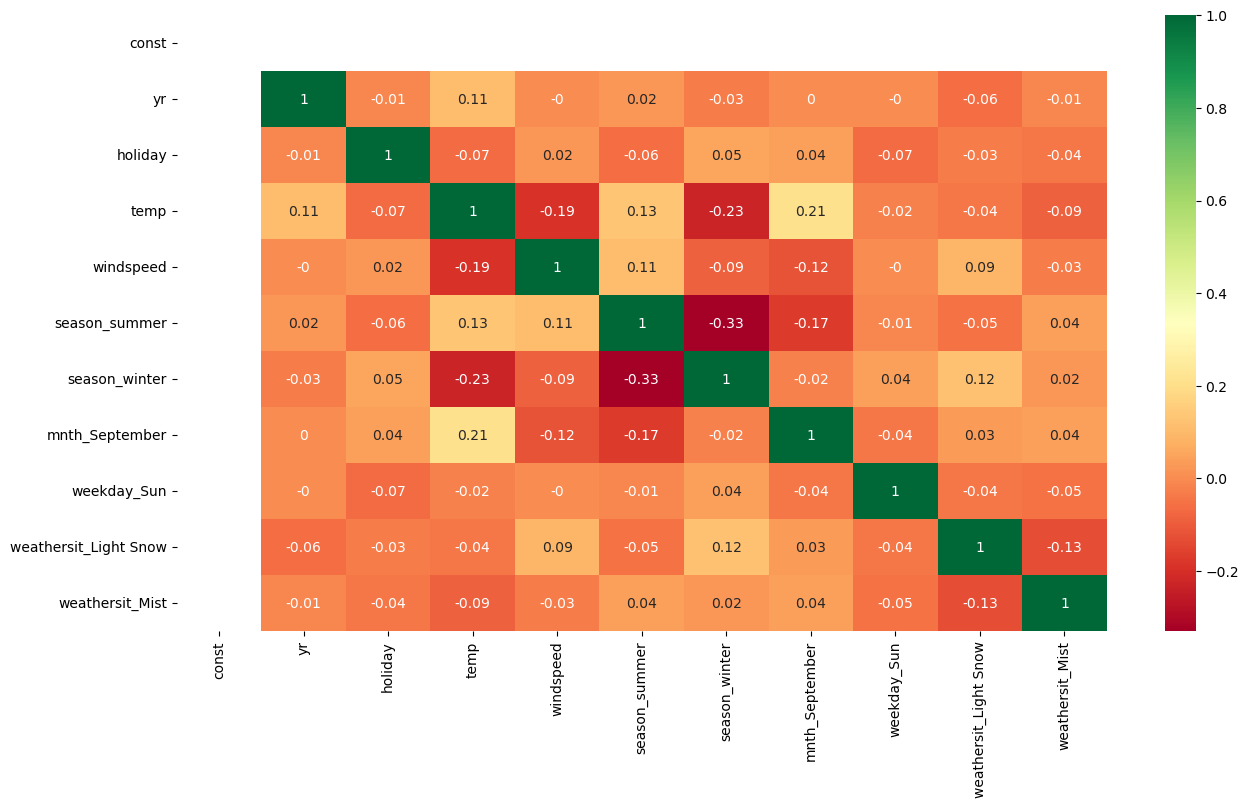

In [74]:
# Correlation Co-efficients of Predictors Impacting Target Variable 
plt.figure(figsize=(15,8))
sns.heatmap(round(X_train_f.corr(),2),annot = True, cmap="RdYlGn")
plt.show()

In [75]:
# Applying scaling on the test dataset

num_vars = ['temp', 'atemp', 'hum', 'windspeed','cnt']
bike_sharing_test[num_vars] = scaler.transform(bike_sharing_test[num_vars])
bike_sharing_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
184,0,1,0,0.831783,0.769660,0.575080,0.084219,0.692706,0,0,...,0,0,1,0,0,0,0,0,0,1
535,1,0,1,0.901354,0.842587,0.516506,0.153728,0.712034,0,1,...,0,0,0,0,0,0,0,1,0,0
299,0,0,1,0.511964,0.496145,0.798722,0.334206,0.303382,0,0,...,1,0,0,0,0,1,0,0,0,1
221,0,0,1,0.881625,0.795343,0.301917,0.339570,0.547400,0,0,...,0,0,0,0,0,0,0,1,0,0
152,0,0,1,0.817246,0.741471,0.149627,0.537414,0.569029,0,1,...,0,0,0,0,0,1,0,0,0,0


In [76]:
bike_sharing_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_spring,season_summer,...,mnth_October,mnth_September,weekday_Mon,weekday_Sat,weekday_Sun,weekday_Thu,weekday_Tue,weekday_Wed,weathersit_Light Snow,weathersit_Mist
count,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,...,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000,220.000000
mean,0.481818,0.036364,0.700000,0.558718,0.532847,0.551340,0.313293,0.522154,0.254545,0.263636,...,0.086364,0.086364,0.127273,0.118182,0.145455,0.163636,0.168182,0.100000,0.027273,0.318182
std,0.500809,0.187620,0.459303,0.233187,0.217401,0.184403,0.159584,0.219163,0.436599,0.441609,...,0.281541,0.281541,0.334038,0.323559,0.353363,0.370789,0.374881,0.300684,0.163248,0.466833
min,0.000000,0.000000,0.000000,0.046591,0.025950,0.084665,-0.042808,0.048205,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.355429,0.344870,0.416134,0.198843,0.378595,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.558172,0.544652,0.535676,0.300126,0.524678,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.755981,0.713308,0.682271,0.402718,0.677750,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,1.000000,1.000000,1.000000,0.984424,0.980934,1.002662,0.807474,0.963300,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
y_test = bike_sharing_test.pop('cnt')
X_test = bike_sharing_test

In [78]:
col1 = X_train_ml4.columns

X_test = X_test[col1]

# Adding constant variable to test dataframe
X_test = sm.add_constant(X_test)

In [79]:
y_test_pred = lr_f.predict(X_test)

In [80]:
r2 = r2_score(y_test, y_test_pred)
round(r2,4)

0.7965

Text(0, 0.5, 'y_pred')

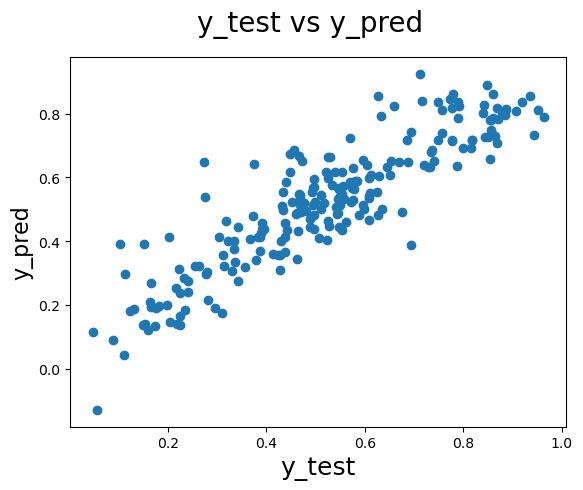

In [81]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_test_pred)
fig.suptitle('y_test vs y_pred', fontsize = 20) 
plt.xlabel('y_test', fontsize = 18)
plt.ylabel('y_pred', fontsize = 16)

In [82]:
# Calculating Adjusted-R^2 value for the test dataset

adjusted_r2 = round(1-(1-r2)*(X_test.shape[0]-1)/(X_test.shape[0]-X_test.shape[1]-1),4)
print(adjusted_r2)

0.7857


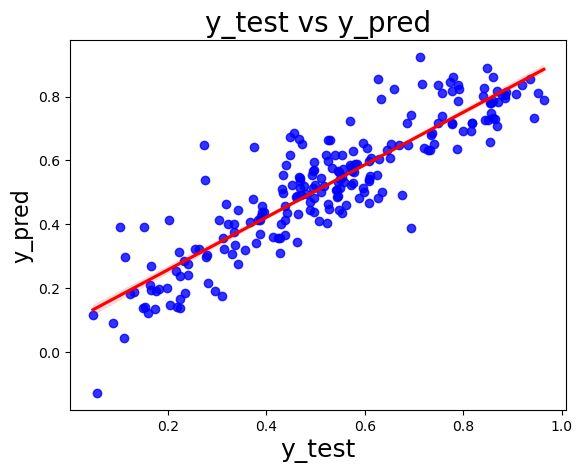

In [83]:
# Visualizing the fit on the test data
# plotting a Regression plot

plt.figure()
sns.regplot(x=y_test, y=y_test_pred, ci=68, fit_reg=True,scatter_kws={"color": "blue"}, line_kws={"color": "red"})
plt.title('y_test vs y_pred', fontsize=20)
plt.xlabel('y_test', fontsize=18)
plt.ylabel('y_pred', fontsize=16)
plt.show()

In [84]:
round(lr_f.params,4)

const                    0.1344
yr                       0.2328
holiday                 -0.1067
temp                     0.5471
windspeed               -0.1531
season_summer            0.0878
season_winter            0.1311
mnth_September           0.0994
weekday_Sun             -0.0498
weathersit_Light Snow   -0.2883
weathersit_Mist         -0.0806
dtype: float64

## Comparision between Training and Testing dataset:
- Train dataset R^2          : 0.836
- Test dataset R^2           : 0.7965
- Train dataset Adjusted R^2 : 0.833    
- Test dataset Adjusted R^2  : 0.7857